In [ ]:
import cv2
import PIL
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


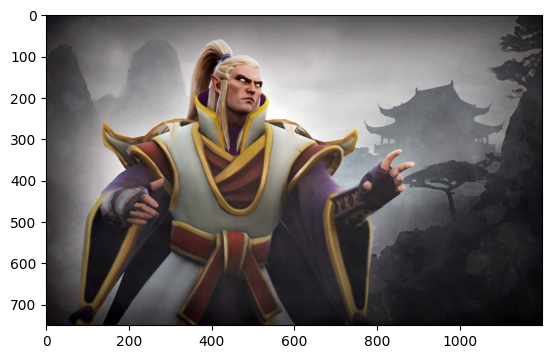

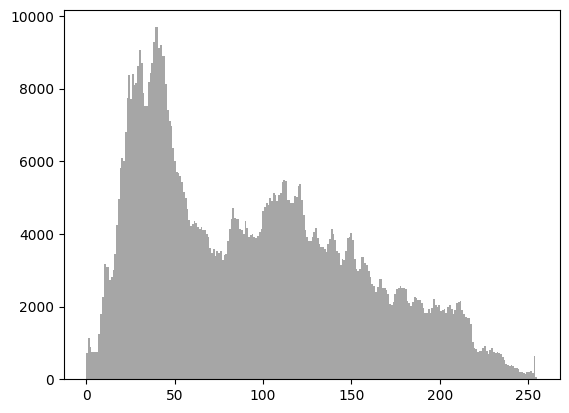

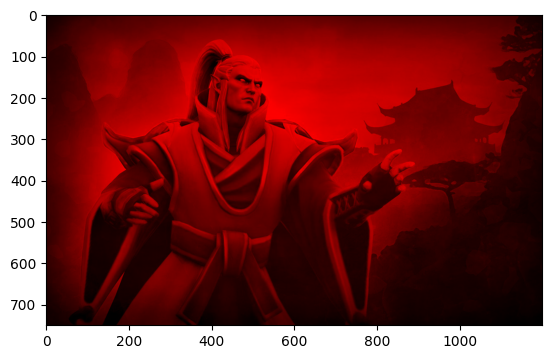

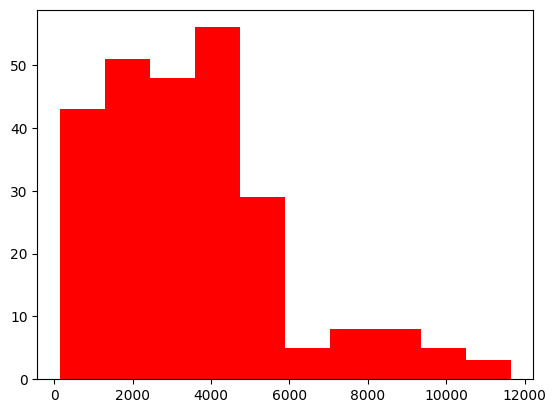

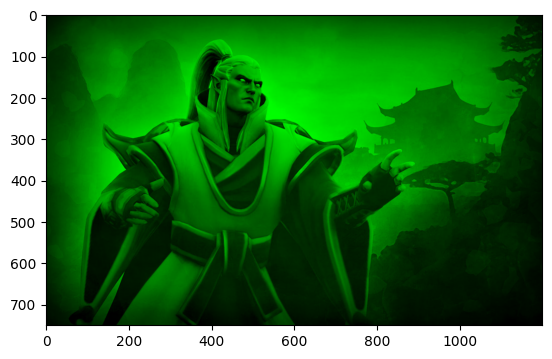

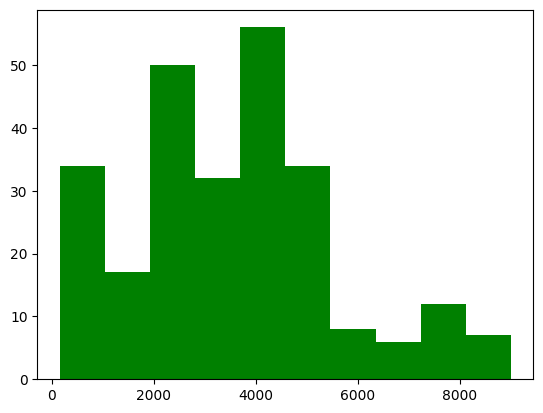

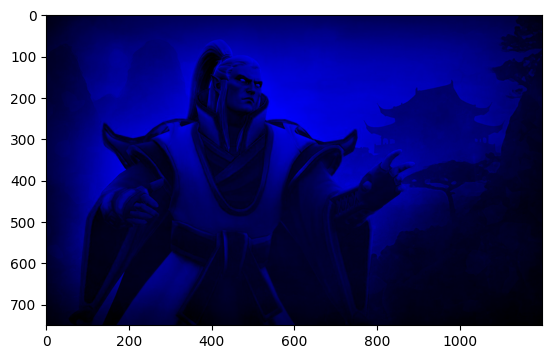

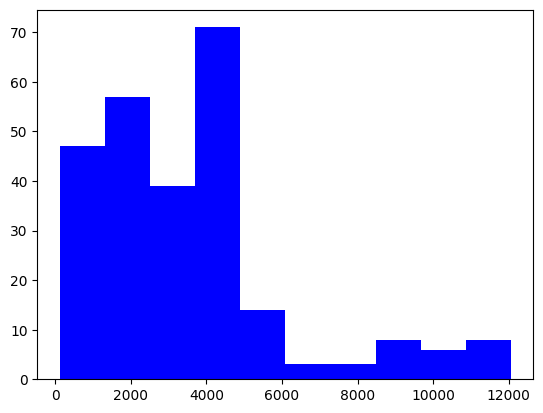

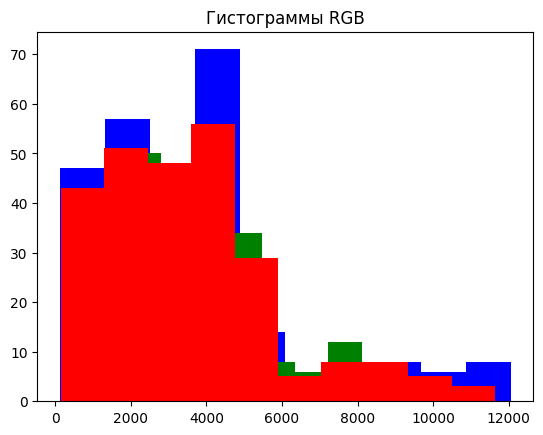

In [ ]:
#Первая часть ЛР
#Построение гистрограммы
#Считывание изображения
im = Image.open('обработка.jpg')
plt.imshow(im)
plt.show()

# Конвертируем изображение в градации серого
img_gray = im.convert('L')
# Преобразуем изображение в массив чисел
img_data = img_gray.getdata()
# Строим гистограмму
plt.hist(img_data, bins=256, color='gray', alpha=0.7)
plt.show()

# Вернем значения разложения по спектру RGB
data = im.getdata()

# Собаерем нужные нам цветности
r = [(d[0], 0, 0) for d in data]
g = [(0, d[1], 0) for d in data]
b = [(0, 0, d[2]) for d in data]
rd = np.array([[d[0], 0, 0] for d in data], dtype=np.uint8)
# Cформируем красное изображение и сохраним его в формате к примеру png
im.putdata(r)
im.save('r.png')
im.putdata(g)
im.save('g.png')
im.putdata(b)
im.save('b.png')
#
imageObj = cv2.imread('обработка.jpg')
# Получение гистограмм цветности
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])

# Выведем изображения в спектрах RGB

datared = Image.open('r.png')
plt.imshow(datared)
plt.show()
# Преобразуем изображение в массив чисел
img_data = datared.getdata()
plt.hist(red_color, color="red")
plt.show()

datagreen = Image.open('g.png')
plt.imshow(datagreen)
plt.show()
plt.hist(green_color, color="green")
plt.show()

datablue = Image.open('b.png')
plt.imshow(datablue)
plt.show()
plt.hist(blue_color, color="blue")
plt.show()
#Комбинация
plt.title("Гистограммы RGB")
plt.hist(blue_color, color="blue")
plt.hist(green_color, color="green")
plt.hist(red_color, color="red")
plt.show()




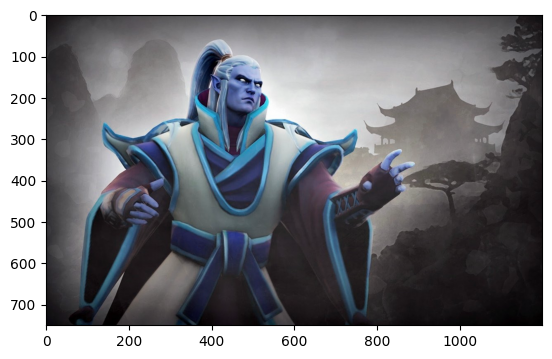

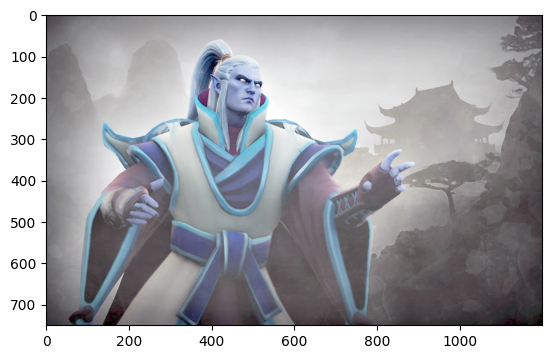

In [ ]:
#Растяжение динамического диапазона openCV
alfa = 0.5
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()

if imageObj.dtype == np.uint8:
  Inew = imageObj.astype(np.float32) / 255
else:
  Inew = imageObj
I_BGR = cv2.split(Inew)
Inew_BGR = list()
for layer in I_BGR:
  Imin = layer.min()
  Imax = layer.max()
  Inew = np.clip(
      (((layer - Imin)/ (Imax - Imin)) ** alfa), 0, 1
  )
  Inew_BGR.append(Inew)
Inew = cv2.merge(Inew_BGR)
plt.imshow(Inew)
plt.show()


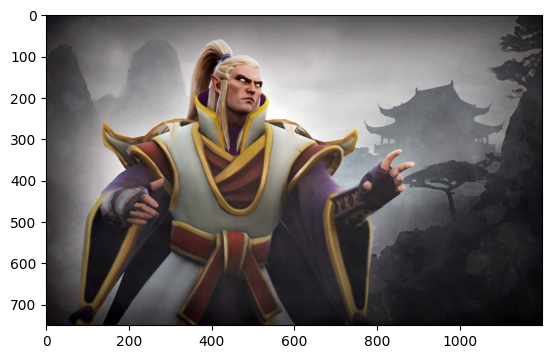

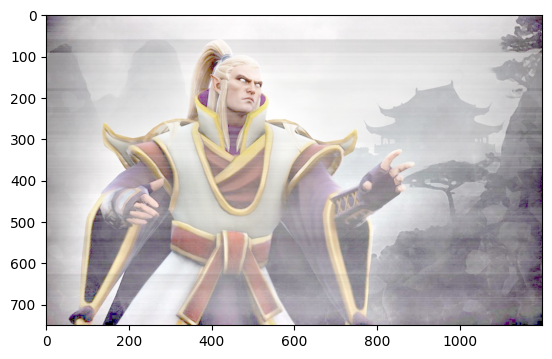

In [ ]:
#Растяжение динамического диапазона при помощи PIL
alfa = 0.3
imageObj = Image.open('обработка.jpg')
img_data = np.array(imageObj) / 255
Inew_RGB = list()
for layer in img_data:
  Imin = layer.min()
  Imax = layer.max()
  Inew = np.clip(
      (((layer - Imin)/ (Imax - Imin)) ** alfa), 0, 1
  )
  Inew_RGB.append(Inew)
#Inew = Image.fromarray(Inew_BGR)
plt.imshow(imageObj)
plt.show()
plt.imshow(Inew_BGR)
plt.show()

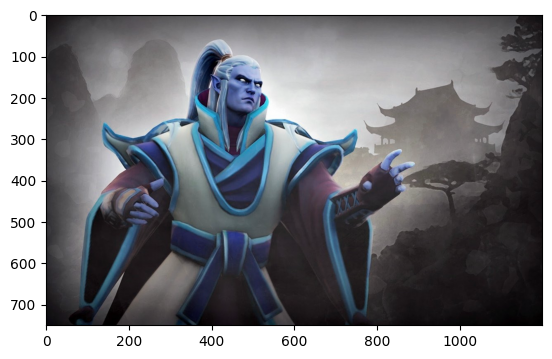

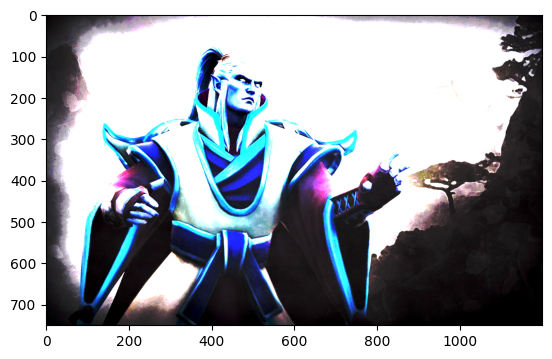

In [ ]:
#Равномерное преобразование
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
Hist  = cv2.calcHist(imageObj, [0], None, [256], (0, 256))
numRows = imageObj.shape[0]
numCols = imageObj.shape[1]
CH = np.cumsum(Hist) / (numRows * numCols)
New = imageObj
New = (imageObj.max() - imageObj.min()) * CH[imageObj] + imageObj.min()
plt.imshow(New)
plt.show()


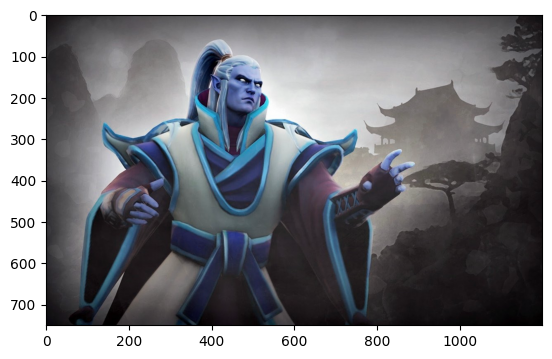

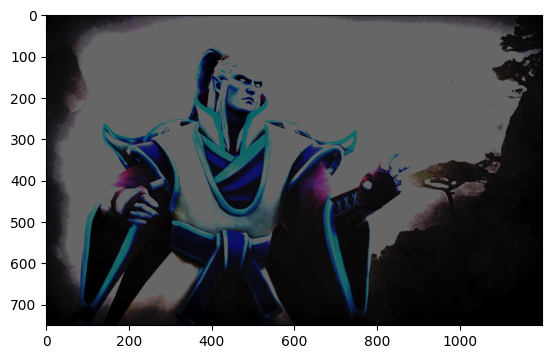

In [ ]:
#Экспоненциальное преобразование
alfa = 0.01
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
Hist  = cv2.calcHist(imageObj, [0], None, [256], (0, 256))
numRows = imageObj.shape[0]
numCols = imageObj.shape[1]
CH = np.cumsum(Hist) / (numRows * numCols)
New = imageObj
New = (imageObj.min() - (1 / alfa) * np.log(1 - CH[imageObj]))
plt.imshow(New)
plt.show()

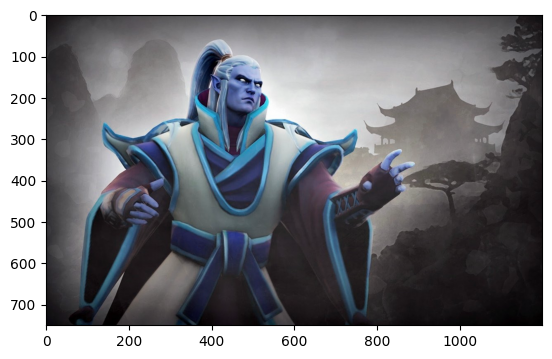

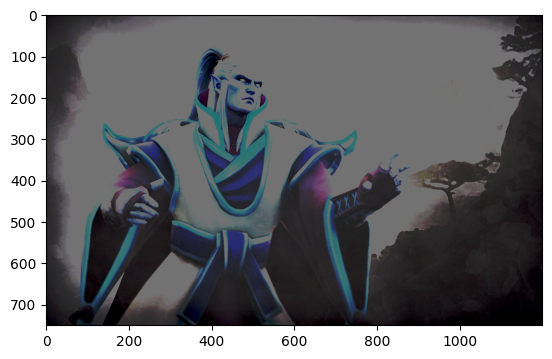

In [ ]:
#Преобразование по закону Рэлея
alfa = 5
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
Hist  = cv2.calcHist(imageObj, [0], None, [256], (0, 256))
numRows = imageObj.shape[0]
numCols = imageObj.shape[1]
CH = np.cumsum(Hist) / (numRows * numCols)
New = imageObj
New = (imageObj.min() + (2 * alfa ** 2 * np.log(1 / (1 - CH[imageObj]))) ** (1/2) )
plt.imshow(New)
plt.show()

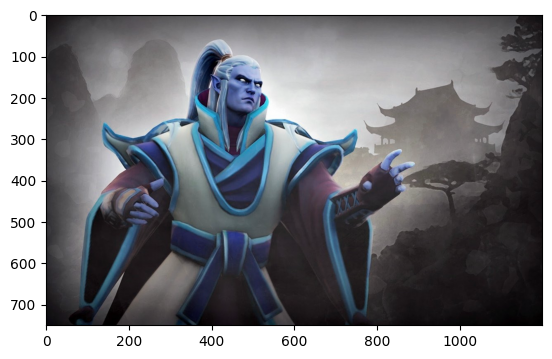

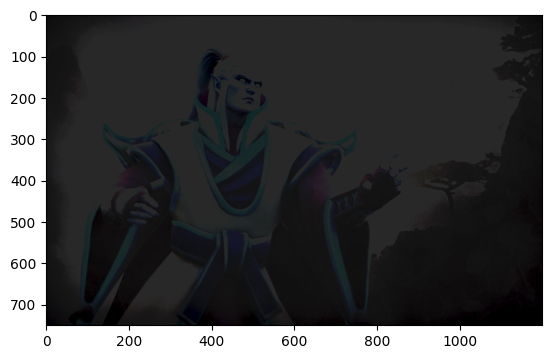

In [ ]:
#Преобразование по закону степени 2/3
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
Hist  = cv2.calcHist(imageObj, [0], None, [256], (0, 256))
numRows = imageObj.shape[0]
numCols = imageObj.shape[1]
CH = np.cumsum(Hist) / (numRows * numCols)
New =(CH[imageObj]) ** (1/3) # с 2/3 выходит плохо
plt.imshow(New)
plt.show()

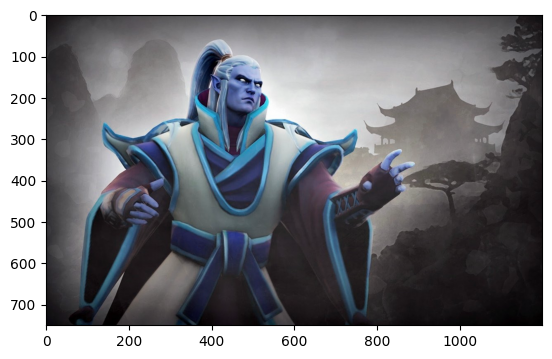

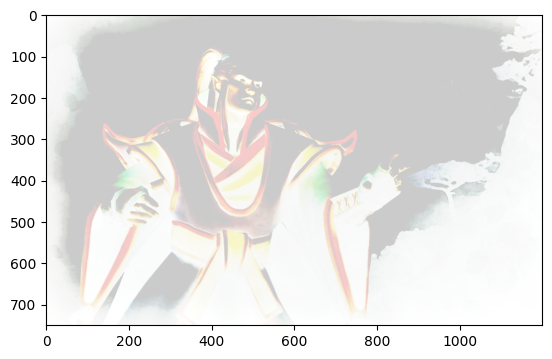

In [ ]:
#Гиперболическое преобразование
alfa = 0.0000000000000000000000003
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
Hist  = cv2.calcHist(imageObj, [0], None, [256], (0, 256))
numRows = imageObj.shape[0]
numCols = imageObj.shape[1]
CH = np.cumsum(Hist) / (numRows * numCols)
New = imageObj
New = (alfa)** CH[imageObj]
plt.imshow(New)
plt.show()

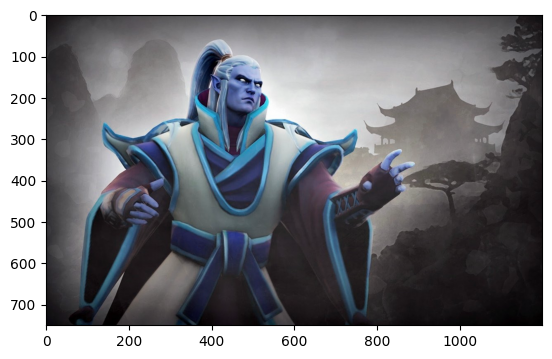

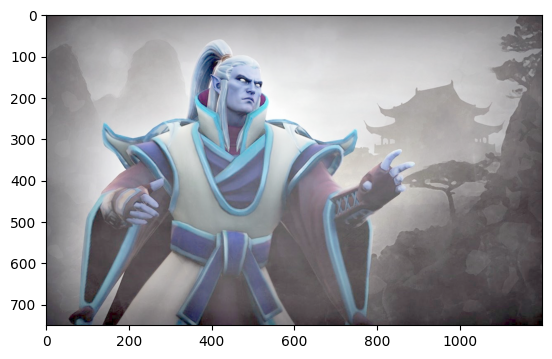

In [ ]:
#Обработка при помощи LUT
alfa = 0.5
I = cv2.imread('обработка.jpg')
Im = I
plt.imshow(I)
plt.show()

if I.dtype == np.uint8:
    Im = imageObj.astype(np.float32) / 255
else:
    Im = imageObj

Imin = np.min(Im)
Imax = np.max(Im)

lut = np.arange(256, dtype=np.uint8) / 255
lut = (lut - Imin) / (Imax - Imin)
lut = np.where(lut > 0, lut, 0)
lut = np.clip(255 * np.power(lut, alfa), 0, 255)
Inew = cv2.LUT(I, lut) / 255

plt.imshow(Inew)
plt.show()

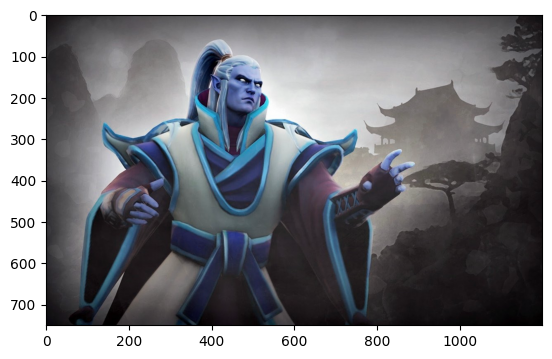

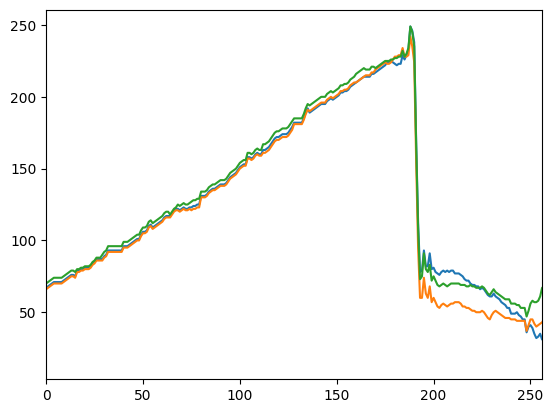

In [ ]:
#Профиль изображения
I = cv2.imread ( 'обработка.jpg' , cv2.IMREAD_COLOR )
plt.imshow(I)
plt.show()
profile = I[ round (I.shape [0] / 2) , :]
plt.figure('profile')
plt.plot(profile)
plt.xlim([0, 256])
plt.show()

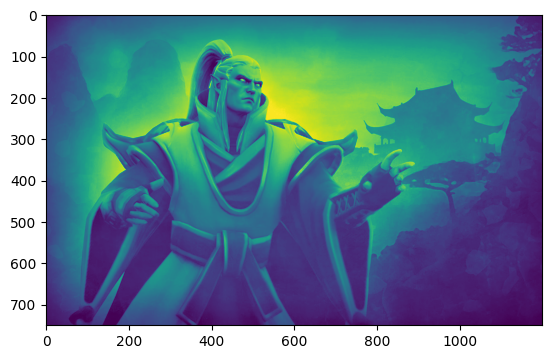

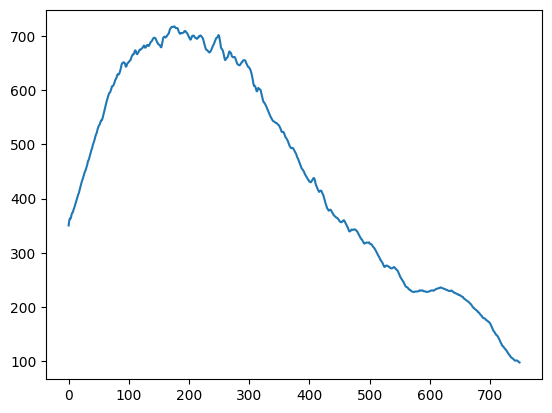

In [ ]:
#Проекция изображения
I = cv2.imread( 'обработка.jpg' , cv2.IMREAD_GRAYSCALE )
plt.imshow(I)
plt.show()

ProjY_img = np.sum(I, 1)/255
plt.figure('projection Oy')
plt.plot(ProjY_img)